In [ ]:
# Data Exploration: US Census data from Raj

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
income_df = pd.read_csv('acs20135yr-csv/x19_income.csv', 
                        usecols=['GEOID','B19001e1','B19001e2','B19001e3','B19001e4','B19001e5','B19001e6','B19001e7','B19001e8','B19001e9','B19001e10','B19001e11','B19001e12','B19001e13','B19001e14','B19001e15','B19001e16','B19001e17',
                                 'B19019e1','B19019e2','B19019e3','B19019e4','B19019e5','B19019e6','B19019e7','B19019e8',
                                 'B19049e1','B19049e2','B19049e3','B19049e4','B19049e5'])
income_df.columns=['GEOID','hhinctotalhh','hhinclt10k','hhinc10-15k','hhinc15-20k','hhinc20-25k','hhinc25-30k','hhinc30-35k','hhinc35-40k','hhinc40-45k','hhinc45-50k','hhinc50-60k','hhinc60-75k','hhinc75-100k','hhinc100-125k','hhinc125-150k','hhinc150-200k','hhincgt200k','medhhincbysizetot','medhhincbysize1p','medhhincbysize2p','medhhincbysize3p','medhhincbysize4p','medhhincbysize5p','medhhincbysize6p','medhhincbysize7p','medhhincbyagetotal','medhhincbyagelt25','medhhincbyage25-44','medhhincbyage45-64','medhhincbyagegt65']
## NEED TO DEAL WITH ISSUE WHERE DATA IS SUPPRESSED BY REMOVING ROWS WITH ZEROS
### SUCH AS GEOID 86000US01003 (Amherst, MA)
income_df.head()

In [6]:
# binned bar chart of income
plt.figure()
px = pop['B00001e1'].plot(kind='hist', bins=10, figsize=(16,4))
#hx = pop['B00002e1'].plot(kind='hist', bins=5, figsize=(16,4))
px.set_ylabel('# of Zip codes')
px.set_xlabel('Population in Zip code')


,GEOID,hhinctotalhh,hhinclt10k,hhinc10-15k,hhinc15-20k,hhinc20-25k,hhinc25-30k,hhinc30-35k,hhinc35-40k,hhinc40-45k,...,medhhincbysize3p,medhhincbysize4p,medhhincbysize5p,medhhincbysize6p,medhhincbysize7p,medhhincbyagetotal,medhhincbyagelt25,medhhincbyage25-44,medhhincbyage45-64,medhhincbyagegt65
0,86000US01001,7056,494,259,355,341,298,325,335,210,...,75128,83480,99549,128295,96413,58733,37533,68766,79127,29383
1,86000US01002,9248,912,707,570,352,543,377,335,234,...,59777,53688,92813,34306,197143,54422,21094,48378,102500,69452
2,86000US01003,16,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86000US01005,1937,61,42,88,113,99,88,40,19,...,83274,93500,83750,NaN,193750,68644,NaN,98000,76667,30265
4,86000US01007,5798,251,190,371,213,399,183,180,154,...,102337,105000,74788,98657,NaN,71875,21016,71976,89867,36173


In [7]:
counts_pop_house = pd.read_csv('acs20135yr-csv/x00_pop_housing_counts.csv')
pop = counts_pop_house.loc[:, ['B00001e1']]
#pop = counts_pop_house.loc[:, ['GEOID','B00001e1']]

In [8]:
pop.describe()#percentiles=[.2,.4,.6,.8])
pop.head()

,B00001e1
0,1117
1,2687
2,NaN
3,350
4,873


In [9]:
poptenth = np.arange(0, pop.max(), pop.max()*.10)
popgroups = pd.cut(pop, poptenth)

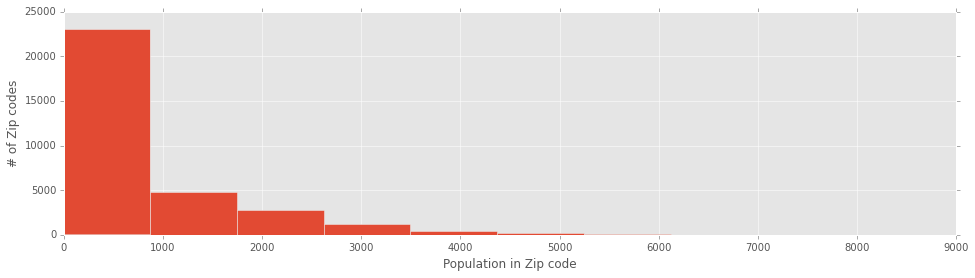

In [10]:
# binned bar chart of population
plt.figure()
px = pop['B00001e1'].plot(kind='hist', bins=10, figsize=(16,4))
#hx = pop['B00002e1'].plot(kind='hist', bins=5, figsize=(16,4))
px.set_ylabel('# of Zip codes')
px.set_xlabel('Population in Zip code')
#plt.ylim(3000, pop.max())


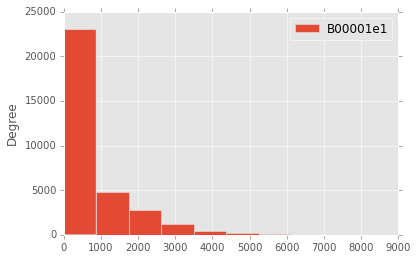

In [11]:
poptenth = np.arange(0, pop['B00001e1'].max(), pop['B00001e1'].max() * .10)
popbinned = pd.cut(pop['B00001e1'], poptenth)
popgroups = pd.value_counts(popbinned)
#popgroups
pop.plot(kind='hist', bins=10, stacked=True)

## Income

In [ ]:
medhhincome = census_df['X19_B19049e1']

In [ ]:
# scatterplot of population
plt.ylim(20000, medhhincome.max())
plt.plot(medhhincome, 'o', label='Median Household Income')

In [ ]:
inctenth = np.arange(0, medhhincome.max(), medhhincome.max() * .10)
incgroups = pd.cut(medhhincome, inctenth)

In [ ]:
incgroups_vcs = pd.value_counts(incgroups)

In [ ]:
#incgroups_vcs.plot(kind='bar')
medhhincome.plot(kind='kde')

In [ ]:
inchist = pd.value_counts(medhhincome, bins=25)
medhhincome.nsmallest(11,take_last=False)

In [ ]:
inchist
#inchist.__class__

In [ ]:
plt.plot(inchist)